In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

# HOME DIRECTION 'C:/Users/ERIC/Desktop/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm'
# ORCA 'C:/Users/Operaciones F/T_S_Analysis'
data_mondays = pd.read_excel('C:/Users/Operaciones F/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm', 2)

# ALL DATA
data_mondays = pd.DataFrame(data_mondays)
# DATA FROM 2017
data_17 = data_mondays.iloc[:, 1:25].values
data_17 = pd.DataFrame(data_17)

# DATA FROM 2018
data_18 = data_mondays.iloc[:, 26:50].values
data_18 = pd.DataFrame(data_18)

# DATA FROM 2019
data_19 = data_mondays.iloc[:, 51:75].values
data_19 = pd.DataFrame(data_19)
# DATA FROM 2019
data_20 = data_mondays.iloc[:, 76:100].values
data_20 = pd.DataFrame(data_20)

data_20.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,319.51,308.46,216.37,215.74,211.59,316.20,384.36,416.92,431.25,432.52,...,455.72,456.21,476.64,498.22,725.16,771.27,749.72,720.79,697.06,442.44
1,400.41,376.54,364.52,365.35,365.48,375.43,413.12,468.53,642.85,654.08,...,654.74,683.42,743.62,701.06,807.56,791.04,776.31,772.80,705.13,477.26
2,390.46,352.13,315.54,312.65,318.43,358.99,419.92,484.51,531.98,559.30,...,678.80,729.46,753.68,726.56,751.84,802.11,773.96,773.12,713.15,495.27
3,334.80,316.03,292.32,221.82,272.34,302.83,377.31,393.64,398.11,407.51,...,413.09,423.93,474.79,473.53,727.37,760.41,732.77,738.64,563.98,654.20
4,370.46,151.27,105.85,96.63,82.97,81.22,106.30,113.98,156.53,387.09,...,453.01,502.70,471.73,706.56,787.90,973.63,1298.91,858.42,801.62,628.91


In [16]:
# AUTOCORRELATION FOR ALL THE HOURS, ALL MONDAYS IN THE 3 YEARS
# Autocorrelation & Augmented Fuller
# Run the ADF test on the price series and print out the results

data_20 = data_20.dropna()
autocorr_u = []
for i in range(24):
    autocorr_u.append(data_20[i].autocorr())
autocorr_u = pd.DataFrame(autocorr_u)
autocorr_u.columns = ['Autocorrelation']

autocorr_diff = []
daily_diff = data_20.diff()
for i in range(24):
    autocorr_diff.append(daily_diff[i].autocorr())

autocorr_diff = pd.DataFrame(autocorr_diff)
autocorr_diff.columns = ['Autocorrelation Diff']

results_af = []
for i in range(24):
    res = adfuller(data_20[i])
    results_af.append(res[1])
results_af = pd.DataFrame(results_af)   
results_af.columns = ['Augmented Dickey Fuller P-value']

results_af_diff = []
diff = data_20.diff()
for i in range(24):
    data_ret = diff[i].pct_change()
    data_ret = data_ret.dropna()
    res = adfuller(data_ret)
    results_af_diff.append(res[1])
results_af_diff = pd.DataFrame(results_af_diff)   
results_af_diff.columns = ['Augmented dickey fuller Diff P-value']

#Positive autocorrelation = Momentum // Negative = Mean reverted
# if p<0.05 we can reject the hypothesis that series is a random walk

autocorr = pd.concat([autocorr_u,autocorr_diff, results_af, results_af_diff], axis = 1)
#autocorr

data_20.head()




,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,319.51,308.46,216.37,215.74,211.59,316.20,384.36,416.92,431.25,432.52,...,455.72,456.21,476.64,498.22,725.16,771.27,749.72,720.79,697.06,442.44
1,400.41,376.54,364.52,365.35,365.48,375.43,413.12,468.53,642.85,654.08,...,654.74,683.42,743.62,701.06,807.56,791.04,776.31,772.80,705.13,477.26
2,390.46,352.13,315.54,312.65,318.43,358.99,419.92,484.51,531.98,559.30,...,678.80,729.46,753.68,726.56,751.84,802.11,773.96,773.12,713.15,495.27
3,334.80,316.03,292.32,221.82,272.34,302.83,377.31,393.64,398.11,407.51,...,413.09,423.93,474.79,473.53,727.37,760.41,732.77,738.64,563.98,654.20
4,370.46,151.27,105.85,96.63,82.97,81.22,106.30,113.98,156.53,387.09,...,453.01,502.70,471.73,706.56,787.90,973.63,1298.91,858.42,801.62,628.91


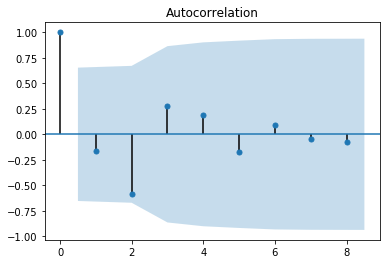

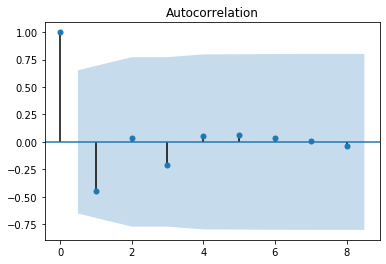

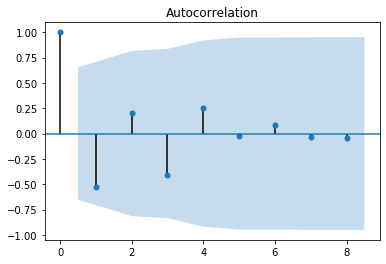

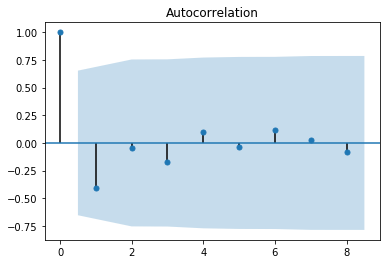

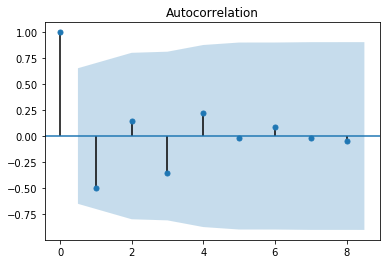

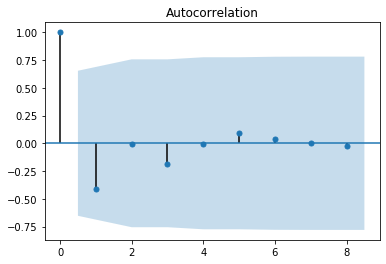

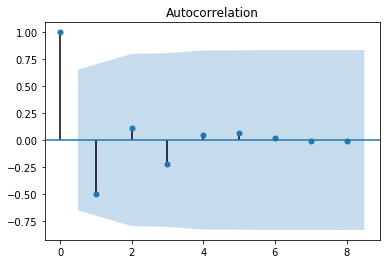

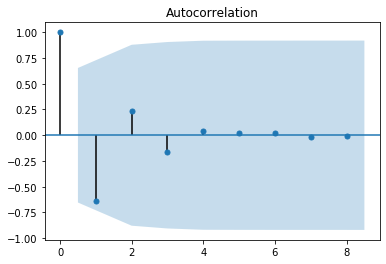

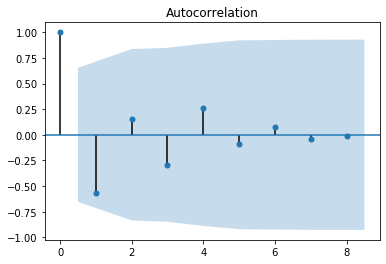

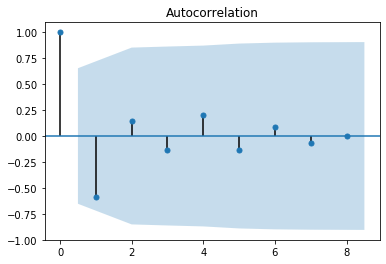

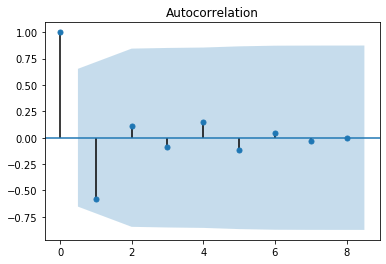

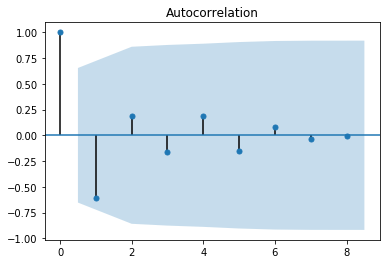

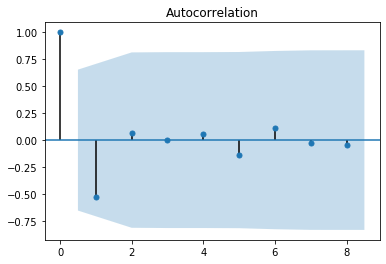

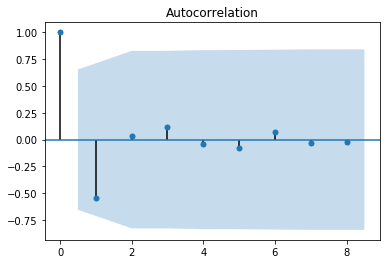

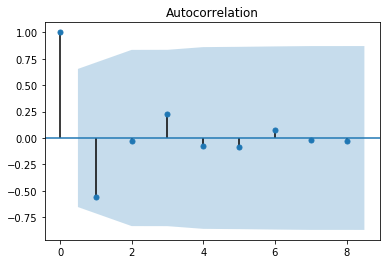

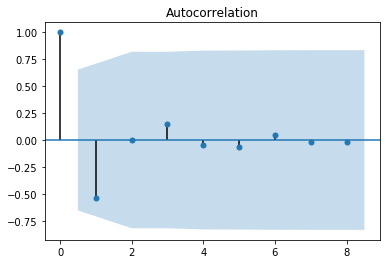

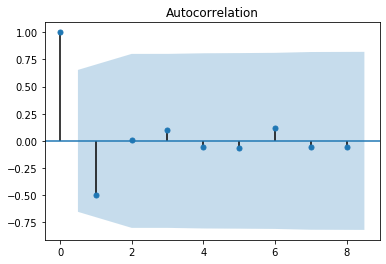

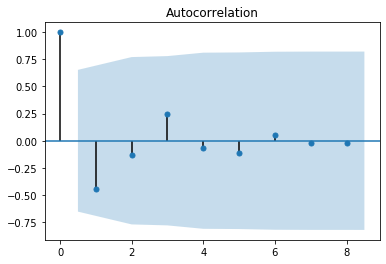

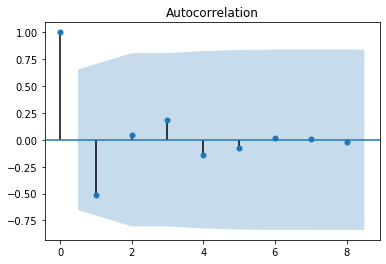

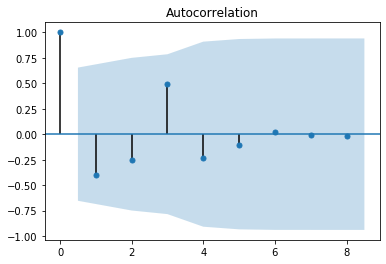

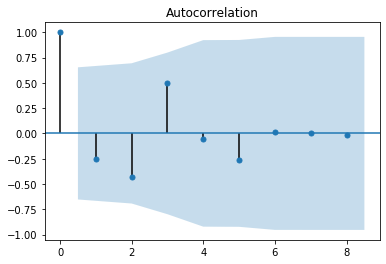

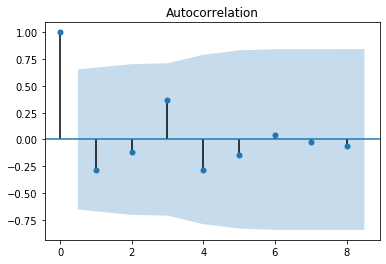

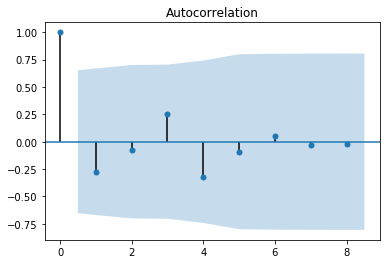

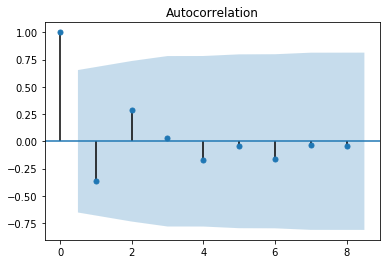

In [20]:

for i in range(24):
    daily_diff = diff.dropna()
    plot_acf(daily_diff[i], alpha = 0.05, fft = False)
    plt.show()


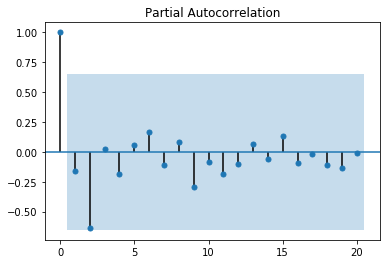

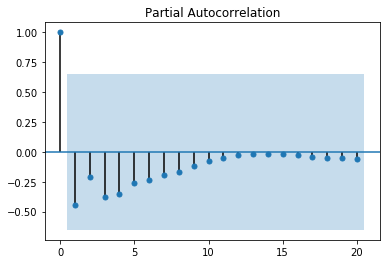

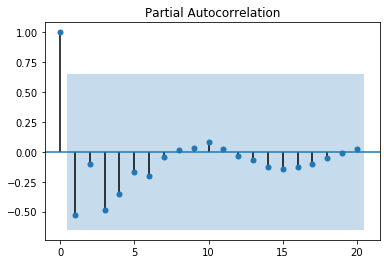

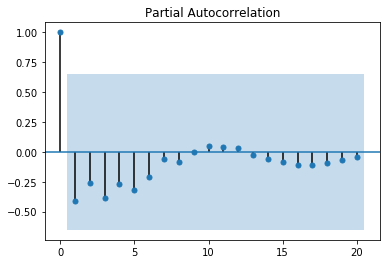

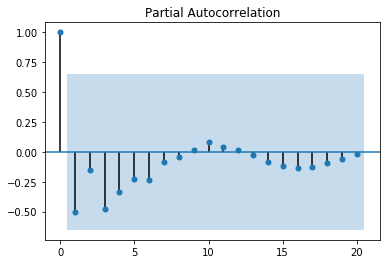

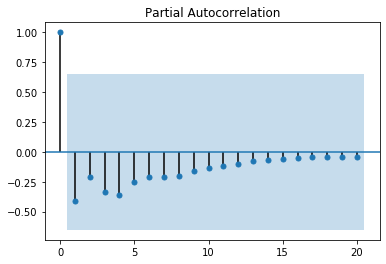

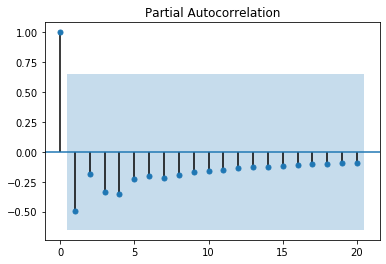

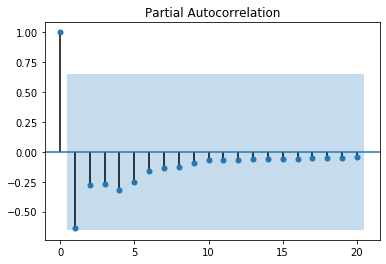

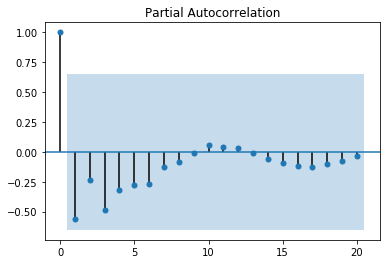

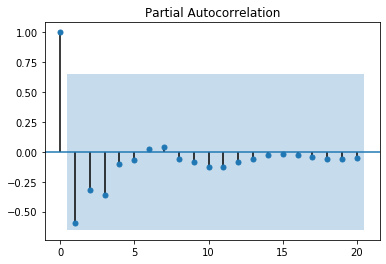

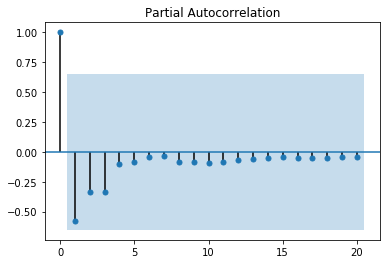

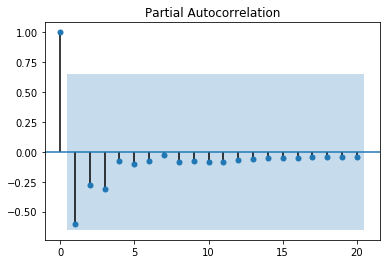

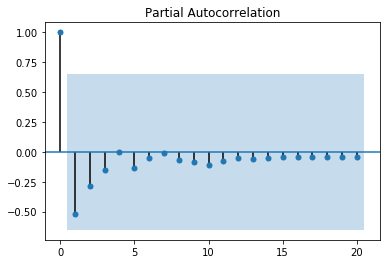

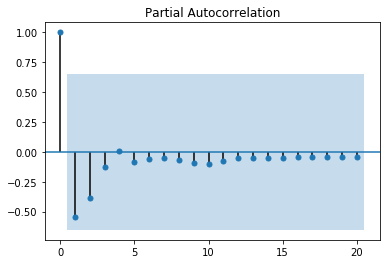

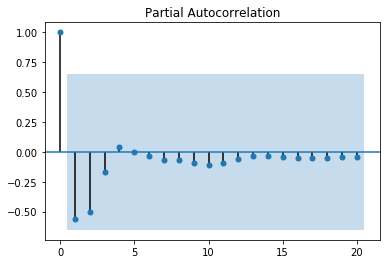

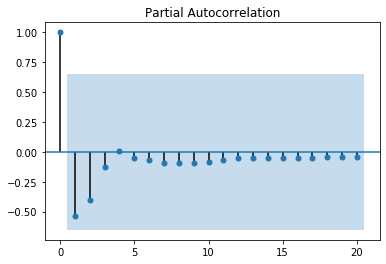

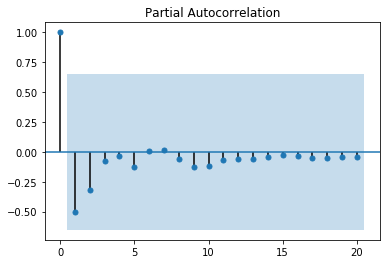

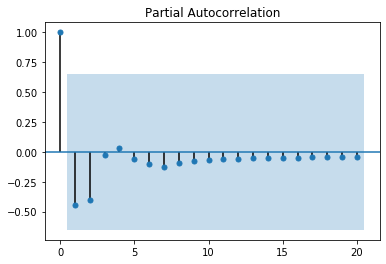

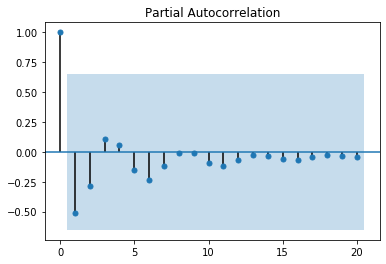

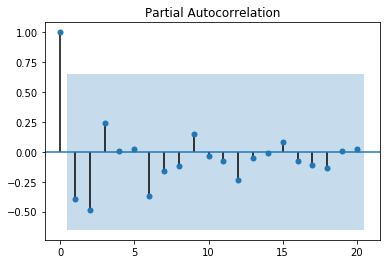

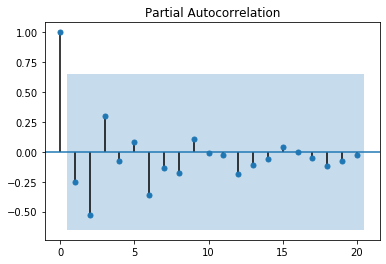

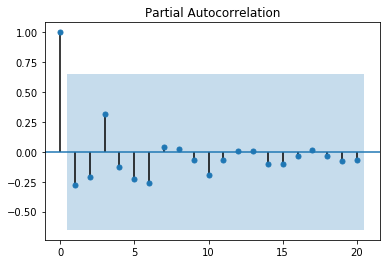

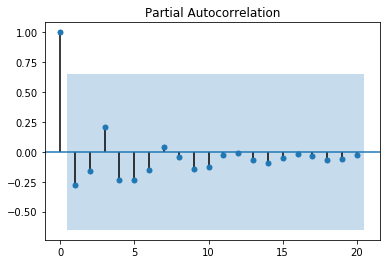

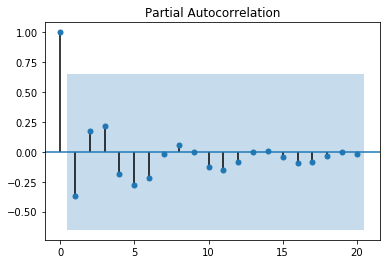

In [28]:
for i in range(24):
    daily_diff = diff.dropna()
    plot_pacf(daily_diff[i], alpha = 0.05, method='ywmle', lags=20)
    plt.show()

In [49]:

auc_f =[]
for i in range(24):
    data = data_20.dropna()
    auc_f.append(acf(data[i], nlags =20, fft = False))
auc_f = pd.DataFrame(auc_f)
#auc_f



,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,319.51,308.46,216.37,215.74,211.59,316.20,384.36,416.92,431.25,432.52,...,455.72,456.21,476.64,498.22,725.16,771.27,749.72,720.79,697.06,442.44
1,400.41,376.54,364.52,365.35,365.48,375.43,413.12,468.53,642.85,654.08,...,654.74,683.42,743.62,701.06,807.56,791.04,776.31,772.80,705.13,477.26
2,390.46,352.13,315.54,312.65,318.43,358.99,419.92,484.51,531.98,559.30,...,678.80,729.46,753.68,726.56,751.84,802.11,773.96,773.12,713.15,495.27
3,334.80,316.03,292.32,221.82,272.34,302.83,377.31,393.64,398.11,407.51,...,413.09,423.93,474.79,473.53,727.37,760.41,732.77,738.64,563.98,654.20
4,370.46,151.27,105.85,96.63,82.97,81.22,106.30,113.98,156.53,387.09,...,453.01,502.70,471.73,706.56,787.90,973.63,1298.91,858.42,801.62,628.91
5,419.22,400.53,386.79,388.05,390.47,396.89,452.61,723.96,724.62,944.11,...,1203.39,1632.40,1205.81,1568.87,1673.27,1648.38,1663.39,1219.83,1214.15,879.88
6,387.62,365.77,316.61,290.35,306.76,365.97,406.27,447.38,442.69,437.67,...,464.19,575.12,634.70,628.81,743.86,830.08,824.88,819.75,784.71,644.79
7,396.56,388.39,383.03,358.30,377.61,404.70,490.93,600.41,564.65,624.86,...,753.83,857.04,944.33,815.72,990.13,1073.36,1064.79,1061.23,952.87,768.75
8,391.07,374.60,338.78,356.64,339.28,381.41,427.46,455.74,445.00,413.91,...,649.54,648.35,703.06,685.81,923.43,1411.53,1401.82,1003.18,734.63,699.81
9,384.05,320.78,298.47,270.39,295.21,306.25,387.02,404.77,410.95,408.76,...,446.92,446.76,462.73,452.38,458.73,586.98,541.17,475.73,443.64,440.54


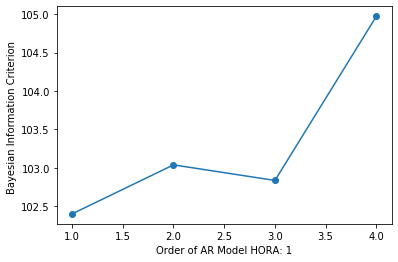

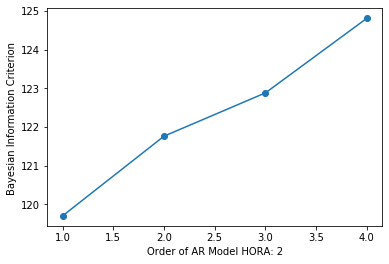

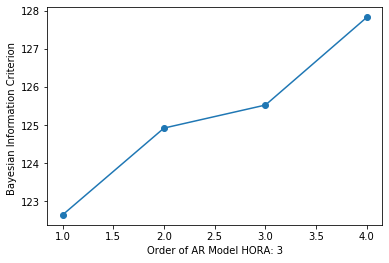

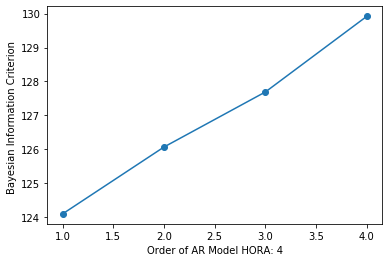

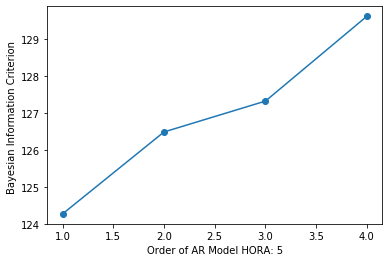

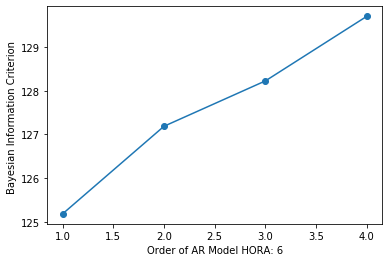

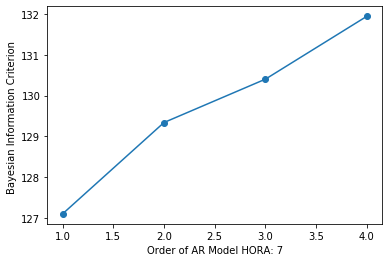

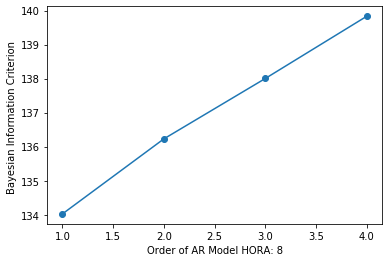

C:\Users\Operaciones F\Miniconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [90]:
BIC = np.zeros(5)
for i in range(24):
    for p in range(5):
        mod = ARMA(data_20[i], order=(p,0))
        res = mod.fit()
    # Save BIC for AR(p)    
        BIC[p] = res.bic

    # Plot the BIC as a function of p
    plt.plot(range(1,5), BIC[1:5], marker='o')
    plt.xlabel('Order of AR Model HORA:' + " " + str(i+1))
    plt.ylabel('Bayesian Information Criterion ')
    plt.show()


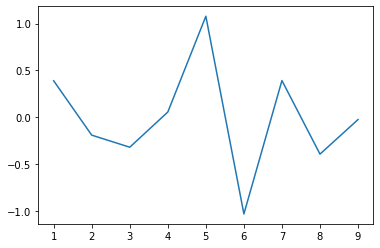

In [14]:
data_log = np.log(data_20[10])
data_log = data_log.diff()
data_log.plot()
plt.show()


In [76]:
data_20 = data_20.dropna()

mod = ARMA(data_20[0], order = (4,0))
res = mod.fit()
'''
print(res.summary())
res.plot_predict(start=0, end=52)
plt.show()
'''
resp = res.predict(start=0, end=10)
resp = pd.DataFrame(resp)
resp2 = resp.iloc[0:52, ].values
resp2 = pd.DataFrame(resp2)
resp2

,0
0,379.790202
1,381.959996
2,409.196034
3,339.313948
4,381.005337
5,404.725039
6,369.154460
7,361.709207
8,404.793300
9,372.934601


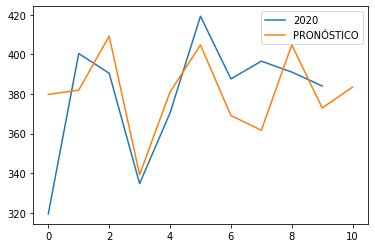

In [77]:
plt.plot(data_20[0], label=2020)
plt.plot(resp2, label='PRONÓSTICO')
plt.legend(loc=1)
plt.show()